# **EXAMPLE 1:** STROKE PREDICTION

# **Stroke Prediction**
*  This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


### To start with, let's import all the required libraries.

*A library is a collection of pre-written code that you can use to do specific tasks. It's like a toolbox full of tools that you can use to make your work easier.
Python has many libraries that you can use for different purposes, such as:*

*NumPy: A library for working with arrays and mathematical operations.*

*Pandas: A library for working with data frames and manipulating data.*

*Matplotlib: A library for creating visualizations and graphs.*

*Scikit-learn: A library for machine learning tasks, like classification and regression.*


## Importing Required Libraries

In [2]:
!pip install mlxtend

In [3]:
!pip install mlxtend==0.18.0

In [4]:
!pip install imblearn

In [5]:
!pip install eli5

In [6]:
!pip install shap

In [7]:
!pip install lime

In [8]:
# libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

# Success metrics for the models
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.svm import LinearSVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectFromModel

#Feature Importance Libraries
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import lime
import lime.lime_tabular
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

#Algorithms for using supervised learning methods
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB

import warnings # filtering the future warnings
warnings.filterwarnings('ignore')

sns.set()

## Creating DataFrame & Data Understanding

The data is stored in a CSV (Comma Separated Values) file, which is a type of file that stores data in rows and columns, separated by commas.

Let's store the dataset in a variable to use it for the rest of code. The file is located online, and the program accesses it using a web address, or URL.

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ParvatiSohani/DSEM_1/main/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [10]:
# Check shape of dataframe - 5110 rows and 12 columns
df.shape

(5110, 12)

It's important to know what kind of data we are storing.

The number of rows and columns in the dataset

The name and data type of each column in the dataset

The number of non-missing values in each column

***This information can be useful for understanding the overall structure of the dataset and for identifying any potential issues, such as missing data or columns with inconsistent data types.***

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Now, summary statistics can help us to understand the overall patterns and characteristics of the data, such as the range of values, the distribution of values, and any potential outliers or unusual patterns.

One way to read if the data is properly distributed/normalized or not, we can compare the value of **mean** and **50%** of that column, if they have very minute difference, they are likely to be distributed normally, but if the difference is alot, it means they are not normally distributed.

###***So why we need normalized dataset?***

We need a normalized dataset in machine learning because it helps us make sure that all the different features in our data are given equal importance. For eg: if we ask a 5 year old to compete with a 10 year old for a drawing competition,The 10-year-old might draw more complex and detailed pictures compared to the 5-year-old. Similarly, in machine learning, we often work with data that has many different features (like age, height, weight, etc.) that can have very different ranges of values. If we don't normalize this data (which means making sure all the features are on the same scale), some features might be more important than others, just like how the 10-year-old's pictures might be more important than the 5-year-old's.

But if we normalize the data, we can make sure that each feature is given equal importance.

This can help our algorithm learn more accurately and make better predictions.

In [12]:
 #statistical description of numeric features
 df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [13]:
#checking if the any data is missing
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Now that we got details about our data, let's think about our outcome again, we want to predict stroke prediction, Now to predict this, ***there are variable which will help us derive the outcome but will all the variable have equal role to help predict the outcome***?

Now that we have obtained details about our data, let's think about our desired outcome: predicting stroke. When making such a prediction, not all variables may contribute equally to the outcome. Therefore, we need to consider whether all variables have an equal role in helping us make our prediction.

To understabd this, we will do Data preproceessinng**feature engineering**

Feature engineering allows us to extract new and useful information from the data we have, which can help us build better machine learning models.

Think of it like making a puzzle. Sometimes you might be missing a few pieces, but if you use your imagination and creativity, you can still complete the puzzle. In the same way, feature engineering helps us to fill in the gaps in our data and find patterns or relationships that might not be immediately apparent.

## Data Preprocessing - Feature Engineering - Exploratory Data Analysis

In [14]:
df.duplicated().any() # There is no duplicated features to be dropped or deal with.

False

In [15]:
df.isnull().any() # There are missing values to deal with

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

### ***As we can see there are missing values, now what can we do for this? Why is handling missing values necessary?***

If we don't handle these missing pieces of information, it can be like trying to solve the puzzle with missing pieces - we might not get the full picture and our conclusions might be wrong.

Similarly, if we don't handle missing information in a dataset, our analysis might be wrong and our conclusions might be incorrect. This can lead to bad decisions and problems down the line.

So to handle missing values, I've decided to fill the missing values with mean values.

Why mean values?
Again to keep our data normalized

In [16]:
#MR
percent_missing = round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head(5)

# bmi feature contains missing values which is just 3.9% of the dataset.
# Filling with median for missing values technique will be used.

Missing_Percentage
bmi                        3.933
id                         0.000
gender                     0.000
age                        0.000
hypertension               0.000

In [17]:
df["bmi"]=df['bmi'].fillna(df.median().iloc[0]) #Filling the missing values with median

In [18]:
df.isnull().values.any() # No more missing values.

False

### Dropping Unnecessary Features
*  id feature will be dropped because it just contains unique id values.

In [19]:
 #dropping "Id" feature from the dataset.
df.drop(["id"], axis=1, inplace=True)

## **Categorical Features' Analysis**

***How Categorical Feature Analysis will help?***

We need to analyze categorical features in a dataset because they can have a significant impact on the target variable. Categorical features are variables that have a limited number of values, such as gender (male or female), marital status (married or single).

For example, in a stroke dataset, we may want to analyze the relationship between smoking status and the incidence of stroke. By examining the number of strokes among smokers and non-smokers, we can gain insight into the impact of smoking on stroke risk. Similarly, we may want to analyze the relationship between gender and stroke risk, or between hypertension and stroke risk. By analyzing these relationships, we can better understand the factors that contribute to stroke risk and develop more accurate predictive models.

In [20]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level      bmi   smoking_status  stroke  
0          Urban             228.69     36.6  formerly smoked       1  
1          Rural             202.21  36932.0     never smoked       1  
2          Rural             105.92     32.5     never smoked       1  
3          Urban             171.23     34.4           smokes       1  
4          Rural             174.12     24.0     never smoked       1

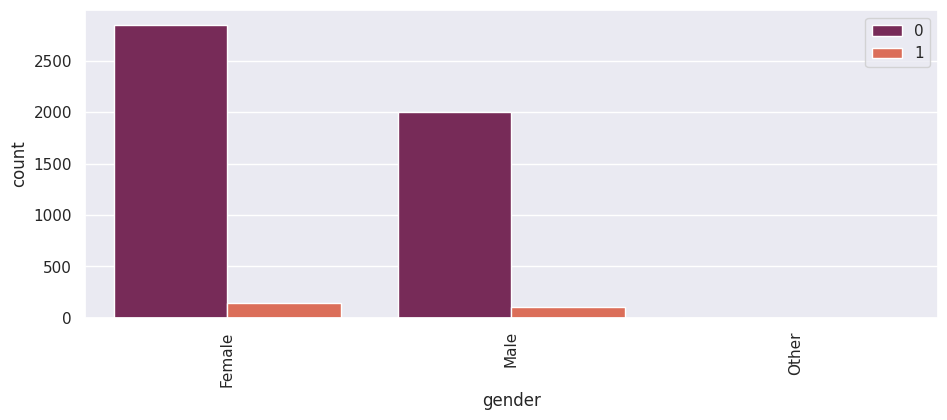

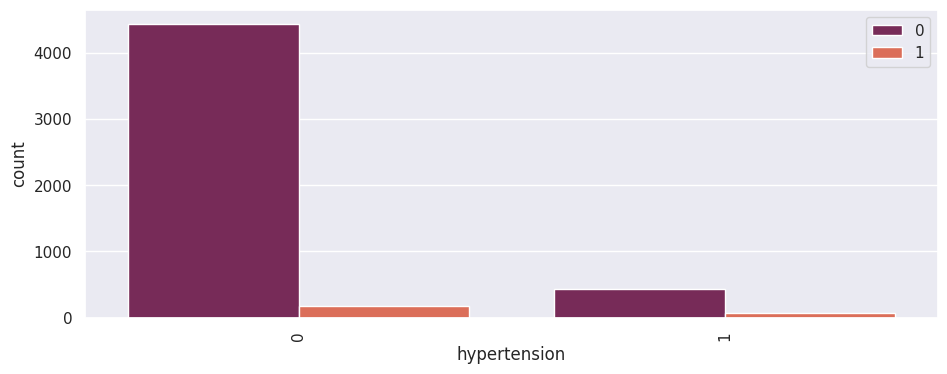

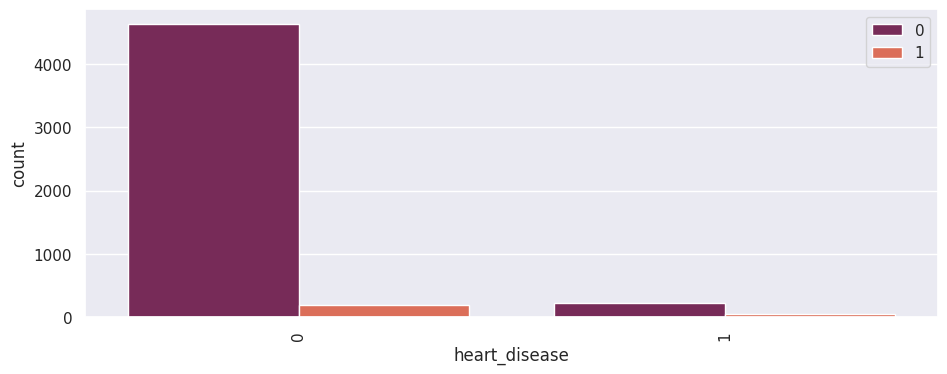

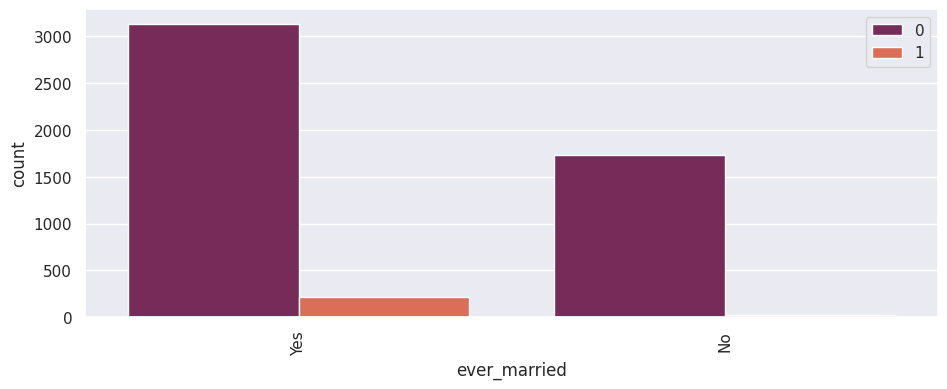

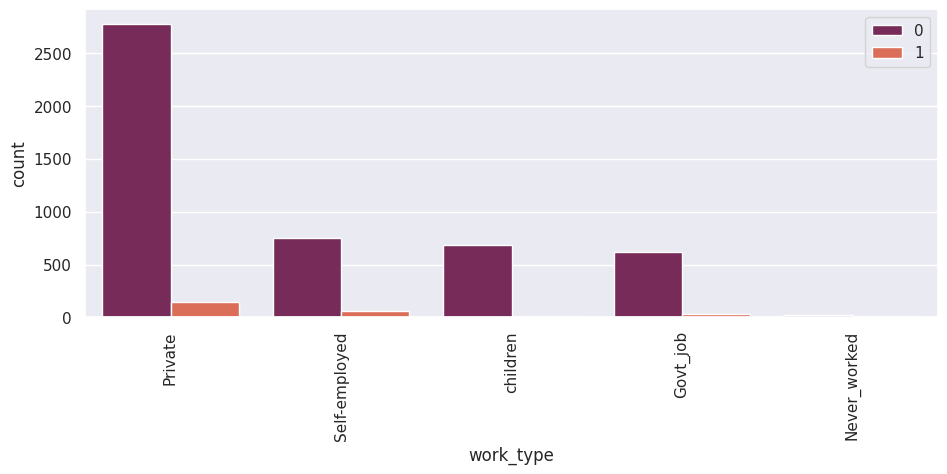

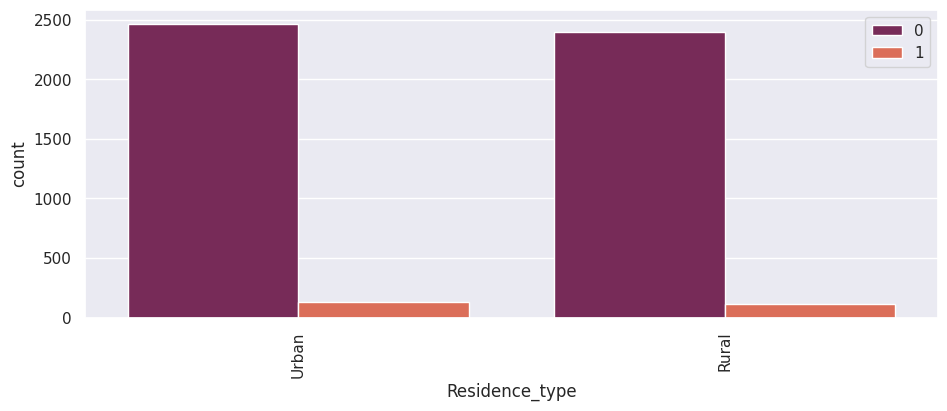

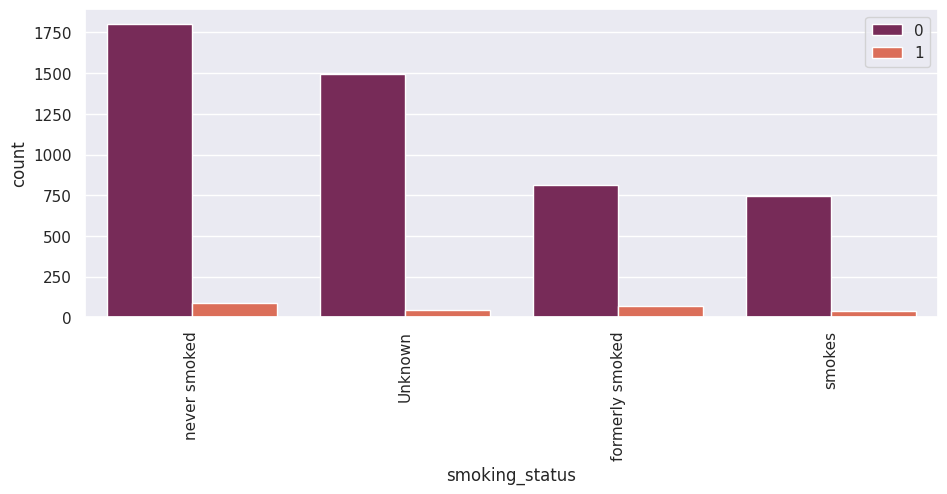

In [21]:
cat_variables = ["gender","hypertension","heart_disease",'ever_married','work_type','Residence_type','smoking_status']
for i in cat_variables:
    fig_dims = (11, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=i, hue="stroke", ax=ax, data=df,palette="rocket",order=df[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

The two bars in each group represent the number of individuals who had a stroke and the number of individuals who did not have a stroke in each category of the categorical variable. For example, in the "gender" graph, the purple bar represents the number of males who did not have a stroke, while the orange bar represents the number of males who had a stroke. Similarly, the purple bar in the "ever_married" graph represents the number of individuals who did not have a stroke and were married, while the orange bar represents the number of individuals who had a stroke and were married.

From this graph, we can conclude that certain categories such as hypertension, heart disease, and smoking status appear to have a higher rate of stroke cases compared to other categories. However, to draw more definitive conclusions, further analysis may be necessary.





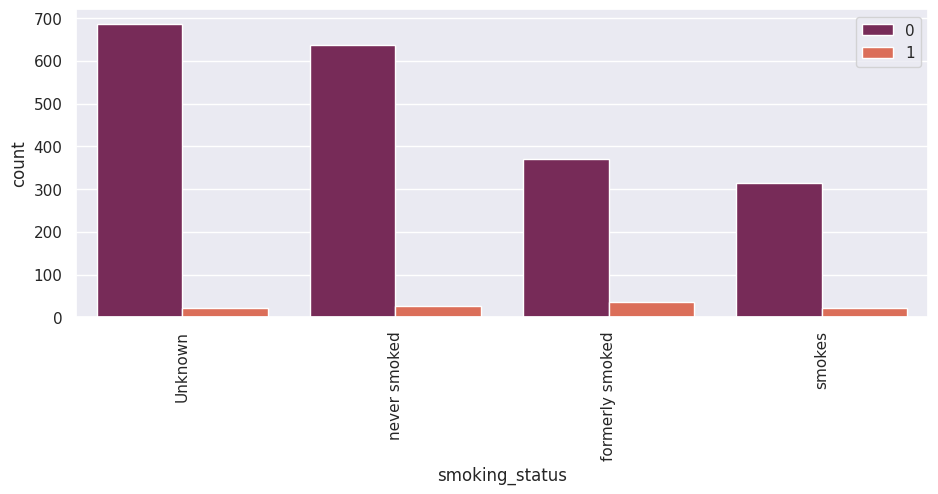

In [22]:
fig_dims = (11, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="smoking_status", hue="stroke", ax=ax, data=df[df['gender']=='Male'], palette="rocket", order=df[df['gender']=='Male']['smoking_status'].value_counts().index)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

There is a slight change in this graph, here ***I wanted to examine the data based on gender***.  For instance, males who were former smokers had a stroke rate that was comparatively higher than those who never smoked or currently smokes.

### **Correlation Matrix For Numeric Features**

### ***Why is it important for us know the relation between variables?***

It is important to know the relationship between variables because it can help us understand how different factors are related to each other. For example, if we find a strong positive correlation between age and the occurrence of stroke in our dataset, we can infer that age may be a risk factor for stroke. This information can help doctors and researchers better understand the causes and risk factors of the disease, and potentially develop more effective prevention and treatment strategies. Similarly, if we find a negative correlation between BMI and stroke, it may suggest that maintaining a healthy weight could be protective against the disease. Overall, understanding the relationships between variables can help us gain insights and make better decisions.

This can be shown using a correlation matrix

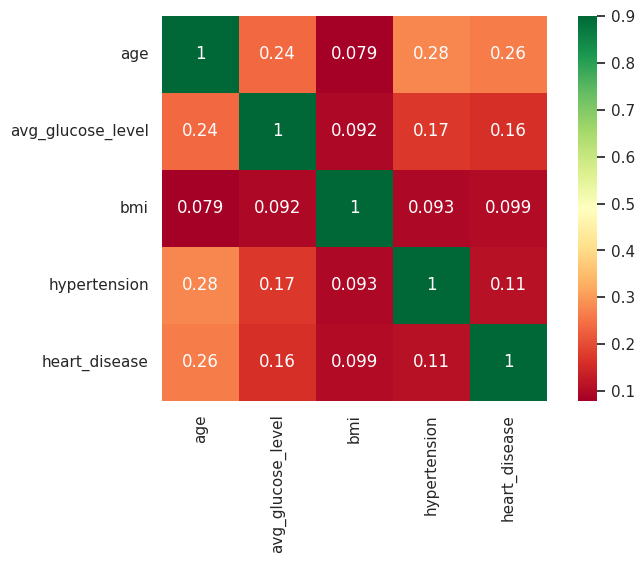

In [23]:
corrmat = df[['age','avg_glucose_level','bmi','hypertension','heart_disease']].corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn')
plt.show();

A correlation matrix shows the relationship between different variables in a dataset. The matrix is a table with each variable compared to every other variable, where each cell shows the correlation coefficient between the two variables being compared.

The correlation coefficient for our dataset ranges from 0.1 to 0.9, where 0.1 represents a perfectly negative correlation (as one variable goes up, the other goes down), 0.9 represents a perfectly positive correlation (as one variable goes up, so does the other), and 0 represents no correlation.

The correlation matrix is showing the correlation coefficients between the variables 'age', 'avg_glucose_level', 'bmi', 'hypertension', and 'heart_disease'. The heatmap shows the correlation coefficients graphically, with positive correlations shown in green and negative correlations shown in red. The darker the color, the stronger the correlation. The values in the cells represent the correlation coefficient between the two variables being compared.

By analyzing the correlation matrix, we can see how strongly different variables are related to each other, and we can use this information to make predictions or to better understand the relationships between variables in our dataset.

### Boxplot for Numeric Features

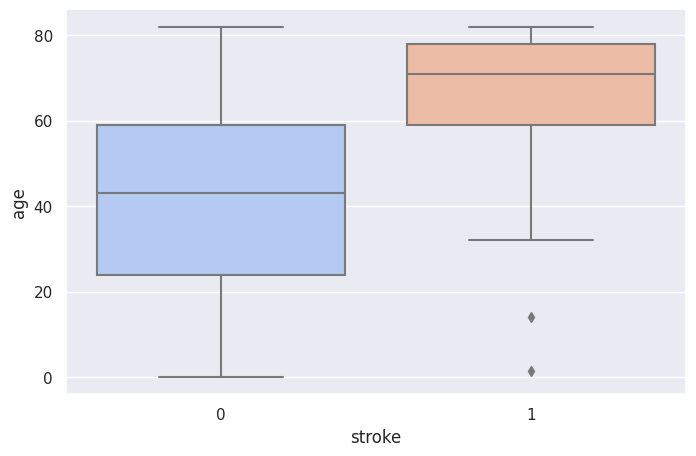

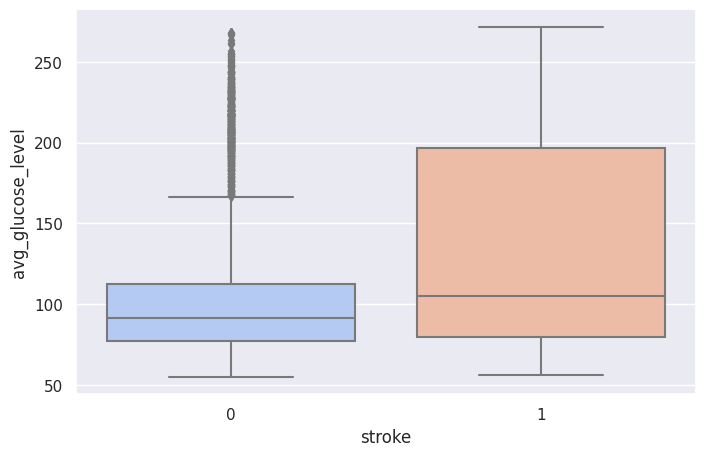

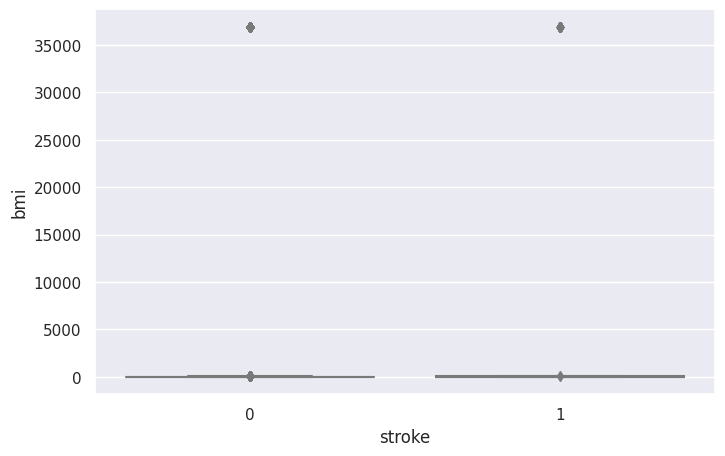

In [24]:
def boxplot(x):
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="stroke",y=df[x],palette="coolwarm")
    plt.show()


feature_list = ['age','avg_glucose_level','bmi']
for i in feature_list:
    boxplot(i)

When the box plot is created for a given feature and the stroke status, we can see how the distribution of the feature differs between those who had a stroke (stroke=1) and those who did not have a stroke (stroke=0). For example, if we look at the age feature, we can see that the median age is slightly higher for those who had a stroke (around 70) compared to those who did not have a stroke (around 45-50). This suggests that age may be a risk factor for stroke. Similarly, we can analyze the box plot for the other features to gain insights into how they may be related to stroke risk. Similarly, if we see that the average glucose level is higher for instances where stroke=1, we might conclude that high glucose levels are also a risk factor for stroke.

### PairPlot For Numeric Features

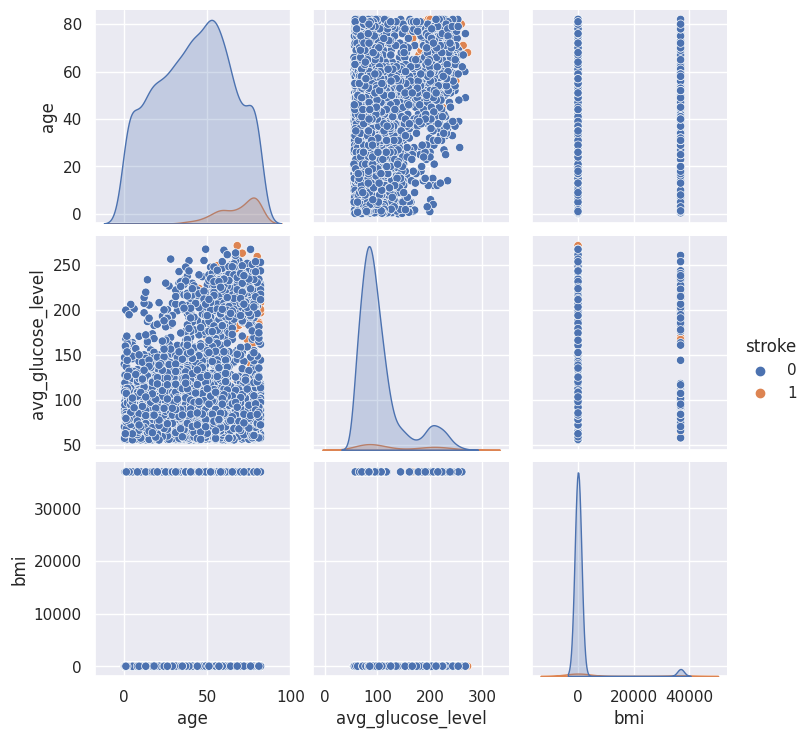

In [25]:
sns.pairplot(df[['age','avg_glucose_level','bmi','stroke']], hue="stroke",height=2.5);

Each plot in the set shows the relationship between two of the variables. For example, one plot might show age on the x-axis and BMI on the y-axis, and the data points will be colored based on whether or not the person had a stroke. This can help us see if there is a relationship between age and BMI that is different for people who have had a stroke compared to those who haven't.

By looking at these plots, we can get a better sense of how different variables in the dataset are related to each other and how they might be related to the risk of having a stroke. For example, if we see that there is a strong relationship between age and stroke, we might conclude that age is an important factor to consider when predicting stroke risk.

### Distrubution Plots for Numeric Features
* Distribution of numeric features are different from each other. 'bmi' feature is close to normally distributed whereas the others have skewed distributions.

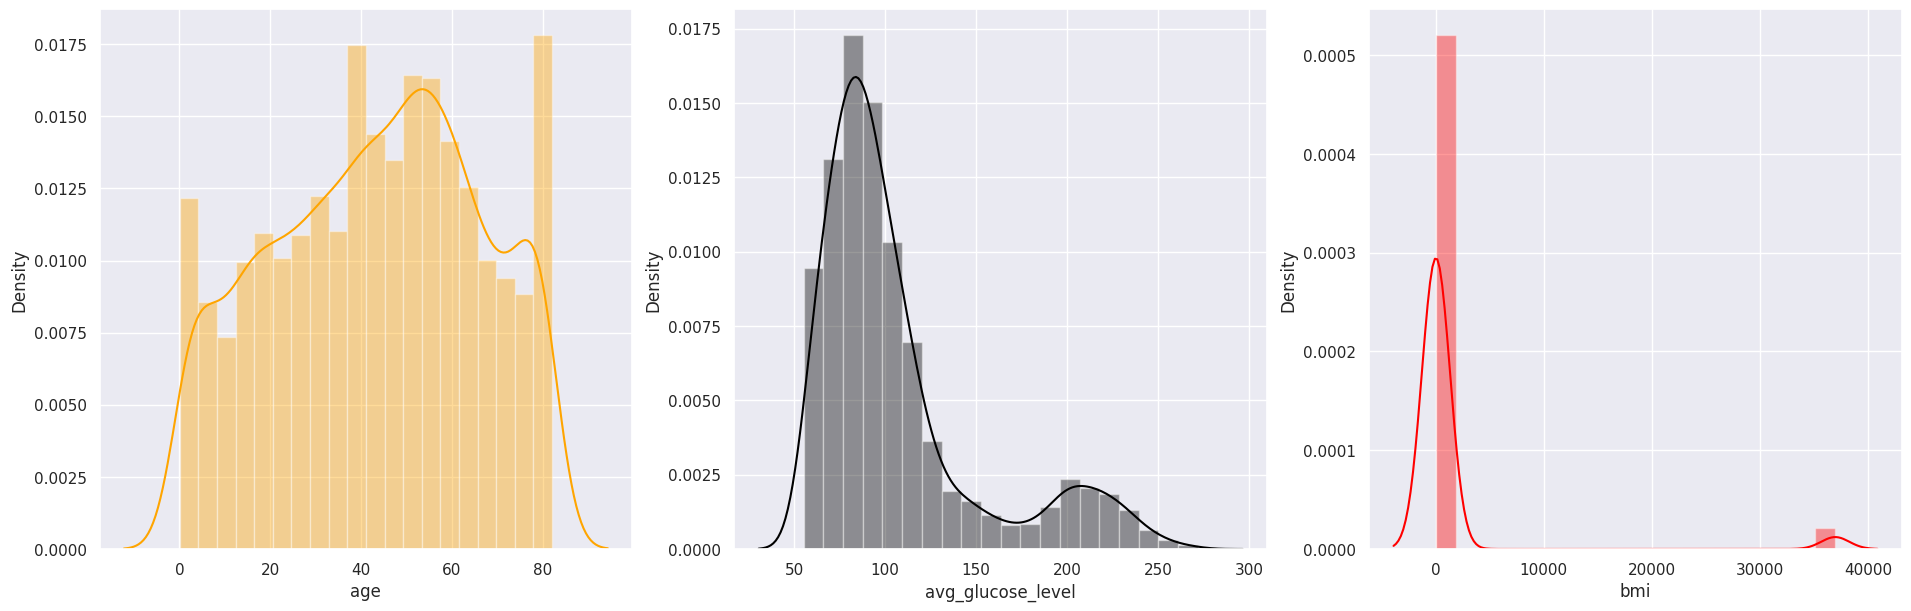

In [26]:
f,ax=plt.subplots(1,3,figsize=(19,6),constrained_layout = True, squeeze=False)
sns.distplot(df["age"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(df["avg_glucose_level"],bins=20,ax=ax[0,1],color='black');

sns.distplot(df["bmi"],bins=20,ax=ax[0,2],color='red');

Each of the three plots is similar in appearance, with a horizontal axis representing the range of values we're looking at (for example, age from 0 to 100), and a vertical axis representing the number of people in our dataset who have a particular value within that range.

The color of the plot represents which feature we're looking at, the shape of the plot tells us about the distribution of values for that feature

The plot for age is showing the distribution of ages of the people in the dataset. The x-axis shows the age values, while the y-axis shows how frequent each age value occurs in the dataset. The curve represents the distribution of the age values. From this plot, we can see that the majority of people in the dataset are between the ages of 40 and 70, with the most frequent age being around 50. The plot also shows that there are a few people who are above the age of 80. Overall, this plot gives us an idea of the age distribution in the dataset.

Overall, these plots can help us understand more about the data we're working with and how it's distributed, which can be useful for many different kinds of analysis.

### Analysis of 'stroke' Feature

*   In the case of the healthcare dataset for stroke prediction, we can observe that out of the total 5,100 instances, only 249 belong to the positive class (i.e., having a stroke), while the remaining 4,861 belong to the negative class (i.e., not having a stroke). This shows that the dataset is highly imbalanced as the number of instances in the positive class is significantly lower than the number of instances in the negative class.
* The class label is highly unbalanced. Dealing with unbalanced class label techniques like SMOTE must be applied.

0    4861
1     249
Name: stroke, dtype: int64


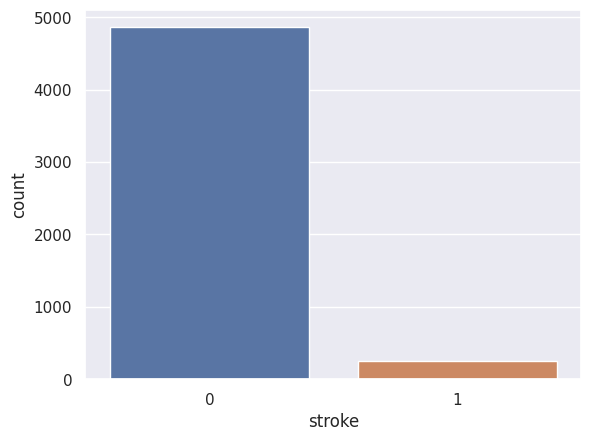

In [27]:
sns.countplot(data=df, x='stroke');
print(df.stroke.value_counts())

## Feature Engineering for "work_type" Feature

In [28]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [29]:
df["work_type"] = np.where(df["work_type"].str.contains("children|Never_worked"),'Have_No_Works',df["work_type"])
# grouping children and Never_worked rows with "Have_No_Works".

In this case, the condition is that the "work_type" column contains the words "children" or "Never_worked". If this condition is true, the corresponding value in the "work_type" column will be replaced with the string "Have_No_Works". If the condition is false, the original value in the "work_type" column will be kept.

The purpose of this code is to group the rows in the "work_type" column that correspond to children and individuals who have never worked into a single group, which is named "Have_No_Works". This can be helpful for further analysis of the data where we want to group individuals based on their work status.

In [30]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
Have_No_Works     709
Govt_job          657
Name: work_type, dtype: int64

## Feature Engineering for "gender" Feature

Only one sample for "Other", will be filtered.

In [31]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Choosing just male and female samples.

In [32]:
df = df[(df["gender"] == "Female") | (df["gender"] =="Male")]

In [33]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

## Applying Normalization
Normalization is a technique used to adjust the values in a dataset to a common scale so that they can be compared with each other fairly. It's like converting different types of units to the same unit for easier comparison.

For example, if you have a dataset with different features like age, height, weight, and income, these features will have different scales and ranges. Age can be from 0 to 100, height can be from 100 cm to 200 cm, weight can be from 30 kg to 150 kg, and income can be from 0 to millions of dollars.

To normalize these features, we use different techniques such as Min-Max scaling, Z-score normalization, and so on. Min-Max scaling rescales the values to a range between 0 and 1. Z-score normalization rescales the values to have a mean of 0 and standard deviation of 1. By doing this, we can make sure that all features have the same influence on the analysis and prevent features with higher magnitudes from dominating the analysis.

For our dataset we are using MinMaxScaler normalizing technique

In [34]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ['age','bmi','avg_glucose_level']
for i in columns_to_be_scaled:
    df[i] = scaling(i)

df.head()

gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  0.816895             0              1          Yes        Private   
1  Female  0.743652             0              0          Yes  Self-employed   
2    Male  0.975586             0              1          Yes        Private   
3  Female  0.597168             0              0          Yes        Private   
4  Female  0.963379             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level       bmi   smoking_status  stroke  
0          Urban           0.801265  0.000712  formerly smoked       1  
1          Rural           0.679023  1.000000     never smoked       1  
2          Rural           0.234512  0.000601     never smoked       1  
3          Urban           0.536008  0.000653           smokes       1  
4          Rural           0.549349  0.000371     never smoked       1

### One-Hot Encoding
One-hot encoding is required when dealing with categorical variables in machine learning algorithms because most algorithms cannot handle categorical data directly. Categorical variables need to be transformed into numerical features for machine learning algorithms to work properly.
In the case of the stroke dataset, there are several categorical features such as "gender", "ever_married", "work_type", "Residence_type", and "smoking_status". One hot encoding could be used to convert these features into numerical values that could be used in a machine learning model.

For example, the "smoking_status" feature has categories of "formerly smoked", "never smoked", "smokes", and "Unknown". After one hot encoding, this feature would be represented as four new features, each indicating whether the original feature was equal to that category or not.
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [35]:
dummy_df_gender = pd.get_dummies(df["gender"],dtype=np.int64,prefix="Gender_is",drop_first=True)
dummy_df_rt = pd.get_dummies(df["Residence_type"],dtype=np.int64,prefix="Residence_type_is",drop_first=True)
dummy_df_hd = pd.get_dummies(df["heart_disease"],dtype=np.int64,prefix="heart_disease_is",drop_first=True)
dummy_df_hyp = pd.get_dummies(df["hypertension"],dtype=np.int64,prefix="hypertension_is",drop_first=True)
dummy_df_married = pd.get_dummies(df["ever_married"],dtype=np.int64,prefix="ever_married_is",drop_first=True)
dummy_df_smoke = pd.get_dummies(df["smoking_status"],dtype=np.int64,prefix="smoking_status_is")
dummy_df_worktype = pd.get_dummies(df["work_type"],dtype=np.int64,prefix="work_type_is")

df = pd.concat([df,dummy_df_gender,dummy_df_rt,dummy_df_hd,dummy_df_hyp,
                dummy_df_married,dummy_df_smoke,dummy_df_worktype],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status','work_type'],axis=1)

df.head()

age  avg_glucose_level       bmi  stroke  Gender_is_Male  \
0  0.816895           0.801265  0.000712       1               1   
1  0.743652           0.679023  1.000000       1               0   
2  0.975586           0.234512  0.000601       1               1   
3  0.597168           0.536008  0.000653       1               0   
4  0.963379           0.549349  0.000371       1               0   

   Residence_type_is_Urban  heart_disease_is_1  hypertension_is_1  \
0                        1                   1                  0   
1                        0                   0                  0   
2                        0                   1                  0   
3                        1                   0                  0   
4                        0                   0                  1   

   ever_married_is_Yes  smoking_status_is_Unknown  \
0                    1                          0   
1                    1                          0   
2                    1                          0   
3                    1                          0   
4                    1                          0   

   smoking_status_is_formerly smoked  smoking_status_is_never smoked  \
0                                  1                               0   
1                                  0                               1   
2                                  0                               1   
3                                  0                               0   
4                                  0                               1   

   smoking_status_is_smokes  work_type_is_Govt_job  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         1                      0   
4                         0                      0   

   work_type_is_Have_No_Works  work_type_is_Private  \
0                           0                     1   
1                           0                     0   
2                           0                     1   
3                           0                     1   
4                           0                     0   

   work_type_is_Self-employed  
0                           0  
1                           1  
2                           0  
3                           0  
4                           1

Now that we have dealt with the data preprocessing, this data is ready to be used in our models


## Machine Learning Modeling

### Train-Test Split
* Splitting the dataset into training and testing as 75% training and 25% testing

In [36]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### Applying SMOTE Technique to Resolve Unbalanced 'stroke' Feature
* SMOTE stands for Synthetic Minority Over-sampling Technique. What it does is it creates new, positive observations by taking the existing positive observations and creating slightly modified versions of them. These new observations are then added to the dataset, making the positive class bigger and more balanced with the negative class.
* The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

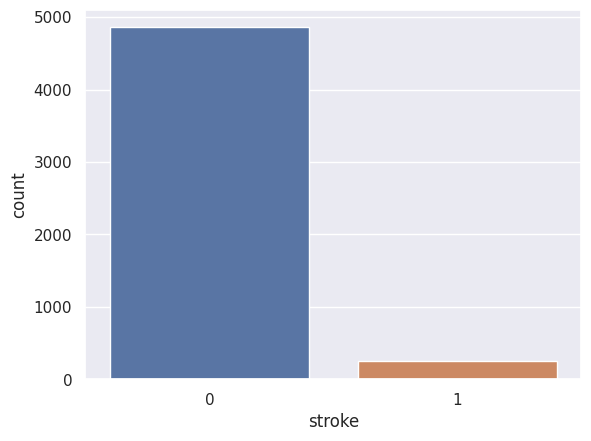

In [37]:
sns.countplot(data=df, x='stroke');

In [38]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape))
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (3831, 16)
Before OverSampling, the shape of y_train: (3831,)
After OverSampling, the shape of X_train_over: (7280, 16)
After OverSampling, the shape of y_train_over: (7280,)


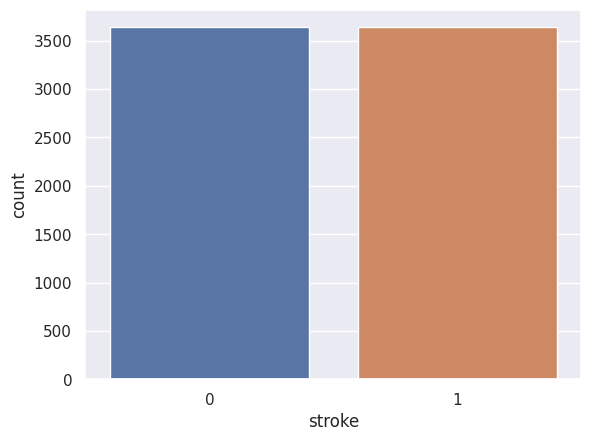

In [39]:
y_train_over_df = y_train_over.to_frame()
sns.countplot(data=y_train_over_df, x='stroke');

### Model 1 - Logistic Regression Classifier
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.
* Logistic Regression is a good choice for this dataset because the target variable ('stroke') is binary, meaning it only has two possible outcomes (0 or 1).
* In this dataset, we are trying to predict whether a person is likely to have a stroke or not based on their age, gender, BMI, smoking habits, and other factors. So, we are using logistic regression to build a model that can predict whether someone is likely to have a stroke or not based on these factors. The model will analyze the relationships between the various factors and the likelihood of having a stroke, and it will use this information to make predictions for new data that it hasn't seen before.

In [40]:
# Object creation, fitting the data & getting predictions
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over)
y_pred_lr = lr.predict(X_test)

Feature importance will help us identify which of these factors are most important in predicting whether someone will have a stroke or not. It is like a scorecard that tells us how important each feature is for the prediction. This can be useful for understanding the underlying patterns and relationships in the data, and for improving the accuracy of the predictions.

*Feature Importance*

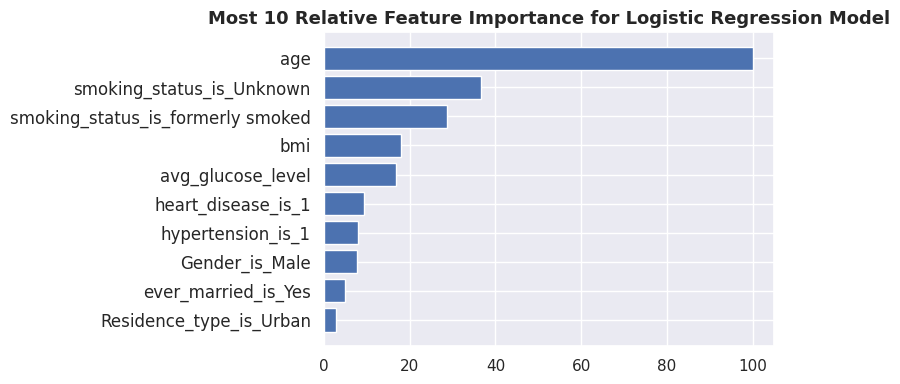

In [41]:

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(8, 4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

**Accuracy** tells us how many of the predictions made by the model were correct. For example, if the model made 100 predictions and got 80 of them right, the accuracy would be 80%.

**F1 score** is a measure that takes into account both precision and recall. Precision is a measure of how many of the predicted positives were actually positive, while recall is a measure of how many of the actual positives were predicted correctly. The F1 score is a kind of weighted average of precision and recall, which gives us an idea of how well the model is doing overall.

**Precision** is used in machine learning to describe how often a model is correct when it makes a positive prediction.

For example, we have a model that predicts whether a person has can get stroke or not. If the model makes a positive prediction for a person, it means that the model thinks the person will get stroke. Precision tells you how often the model is correct when it makes such a prediction.

A high precision score means that the model is making positive predictions correctly most of the time, while a low precision score means that the model is making a lot of false positive predictions. In the context of medical diagnosis, false positive predictions can lead to unnecessary medical interventions, which can be harmful to the patient. Therefore, precision is an important metric to consider when evaluating the performance of a machine learning model.

**Recall** score is a measure of how many of the actual positives were predicted correctly by the model. For example, if there were 100 positive cases in the dataset and the model predicted 90 of them correctly, the recall score would be 90%.

In [42]:
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr,average='weighted'),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

Accuracy score for testing set:  0.76291
F1 score for testing set:  0.83048
Recall score for testing set:  0.76291
Precision score for testing set:  0.93475
[[942 278]
 [ 25  33]]


## Propensity Score Matching

### Propensity Score Matching (PSM) is a statistical technique commonly used in observational studies to reduce selection bias and balance covariates between treatment and control groups. The idea is to estimate the probability (propensity score) of receiving a treatment (e.g., having a stroke in your case) based on observed covariates, and then match treated and control units with similar or close propensity scores.

In [43]:
pip install causalml


In [44]:
!pip install scikit-learn statsmodels

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

X = df[['age', 'hypertension_is_1', 'heart_disease_is_1', 'avg_glucose_level', 'bmi']].fillna(0)
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model to estimate propensity scores
propensity_model = LogisticRegression(random_state=42)
propensity_model.fit(X_train, y_train)

# Calculate propensity scores for the test set
propensity_scores = propensity_model.predict_proba(X_test)[:, 1]

# Combine propensity scores with treatment status (stroke or no stroke)
df_propensity = pd.DataFrame({'PropensityScore': propensity_scores, 'Treatment': y_test})

# Perform propensity score matching using statsmodels
matched_data = sm.add_constant(df_propensity)  # add constant term
matched_data['Matched'] = 0  # initialize matched column

for index, row in df_propensity.iterrows():
    matched_data.loc[(matched_data['Matched'] == 0) &
                     (matched_data['Treatment'] != row['Treatment']), 'Matched'] = 1
    matched_data.loc[(matched_data['Matched'] == 1) &
                     (matched_data['Treatment'] != row['Treatment']), 'Matched'] = 0

# Display matched data or use it for further analysis
print(matched_data)


      const  PropensityScore  Treatment  Matched
4688    1.0         0.008226          0        0
4478    1.0         0.013622          0        0
3521    1.0         0.030840          0        0
4355    1.0         0.156624          0        0
3826    1.0         0.099314          0        0
...     ...              ...        ...      ...
3605    1.0         0.007638          0        0
3510    1.0         0.005153          0        0
4754    1.0         0.026711          0        0
4105    1.0         0.040639          0        0
2902    1.0         0.217961          0        0

[1022 rows x 4 columns]


PropensityScore: This column contains the estimated propensity scores for each observation. Propensity scores represent the likelihood of receiving treatment based on the given features.

Treatment: This column indicates the outcome i.e. whether the individual had a stroke or not.

Matched: This column appears is the result of the matching process. It assigns a value of 1 to the treated units (individuals with a stroke) that were successfully matched and 0 to the control units (individuals without a stroke) that were not matched.

In [46]:
matched_data = sm.add_constant(df_propensity)  # add constant term
matched_data['Matched'] = 0  # initialize matched column

# Initial caliper value
caliper_value = 0.05

for index, row in df_propensity.iterrows():
    matched_data.loc[(matched_data['Matched'] == 0) &
                     (matched_data['Treatment'] != row['Treatment']) &
                     (abs(matched_data['PropensityScore'] - row['PropensityScore']) <= caliper_value), 'Matched'] = 1


In [47]:
# Adjusted caliper value
caliper_value_adjusted = 0.1

for index, row in df_propensity.iterrows():
    matched_data.loc[(matched_data['Matched'] == 0) &
                     (matched_data['Treatment'] != row['Treatment']) &
                     (abs(matched_data['PropensityScore'] - row['PropensityScore']) <= caliper_value_adjusted), 'Matched'] = 1


Experimenting with different caliper values to find the one that provides a good balance between achieving comparability and maximizing the number of matched pairs. Keep in mind that the optimal caliper value may depend on the specifics of your dataset and the characteristics of your treatment and control groups.

# **EXAMPLE 2:** DIAMOND PREDICTION



In this example we will examine Diamond price prediction based on different factors and then we'll use Propensity score

LIBRARIES
# Importing Libraries


In [48]:
#All the libralies used in this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

<a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>LOADING DATA</center></h1>

# Loading Data

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

**Feature description**:

**price** price in US dollars (\$326--\$18,823)This is the target column containing tags for the features.

**The 4 Cs of Diamonds:-**

**carat (0.2--5.01)**
The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

**cut (Fair, Good, Very Good, Premium, Ideal)**
In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

**color, from J (worst) to D (best)**
The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**
Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**


![diamands%20project%20%281%29.png](attachment:diamands%20project%20%281%29.png)

**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)**
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)**

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.


In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/ParvatiSohani/DSEM_1/main/diamonds.csv")
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [50]:
data.shape

(53940, 11)

DATA PREPROCESSING
# Data Preprocessing
**Steps involved in Data Preprocessing**
* Data cleaning
* Identifying and removing outliers
* Encoding categorical variables


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [52]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

**Points to notice:**

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [53]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

**Pairplot Of Data**

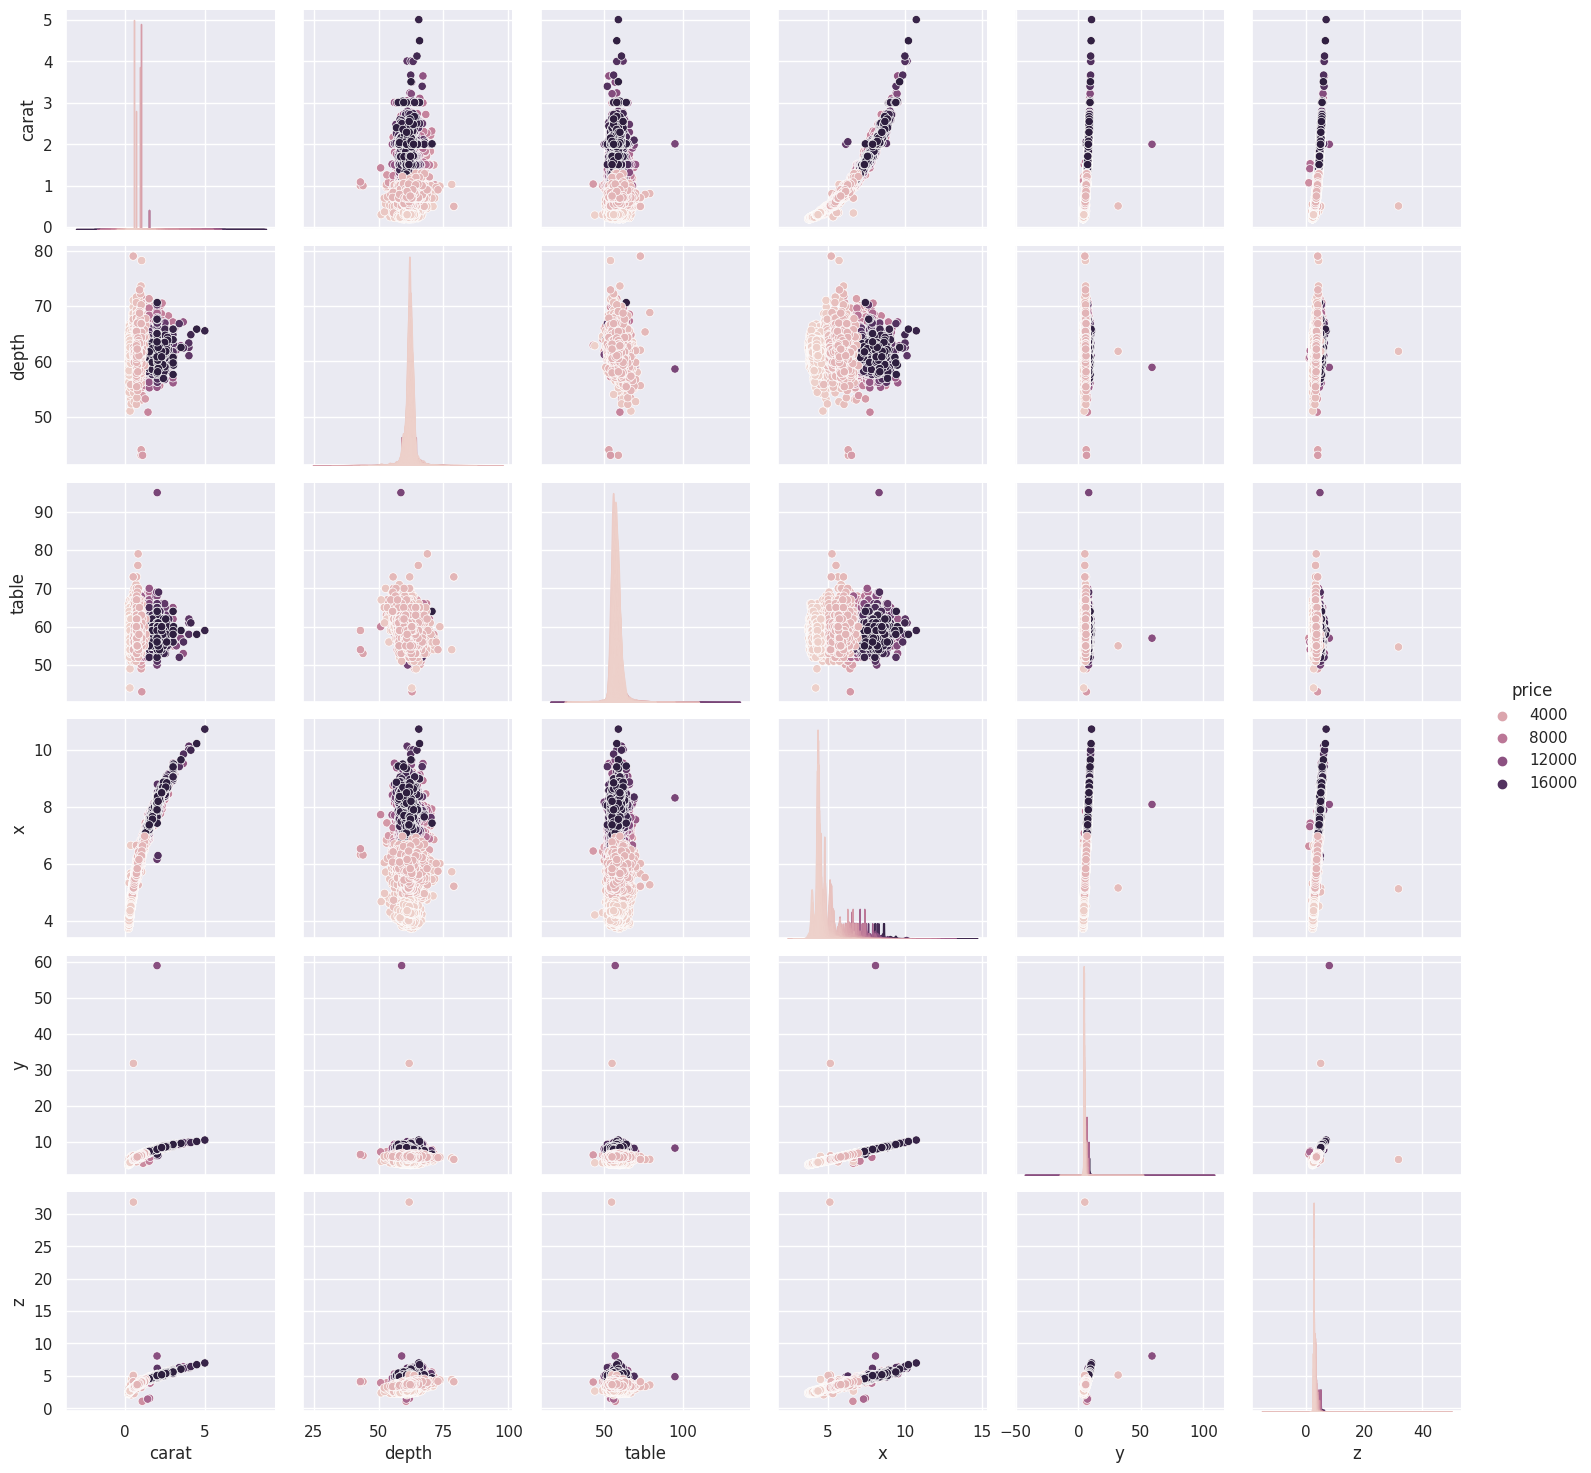

In [54]:
sns.pairplot(data, hue="price",height=2.5);

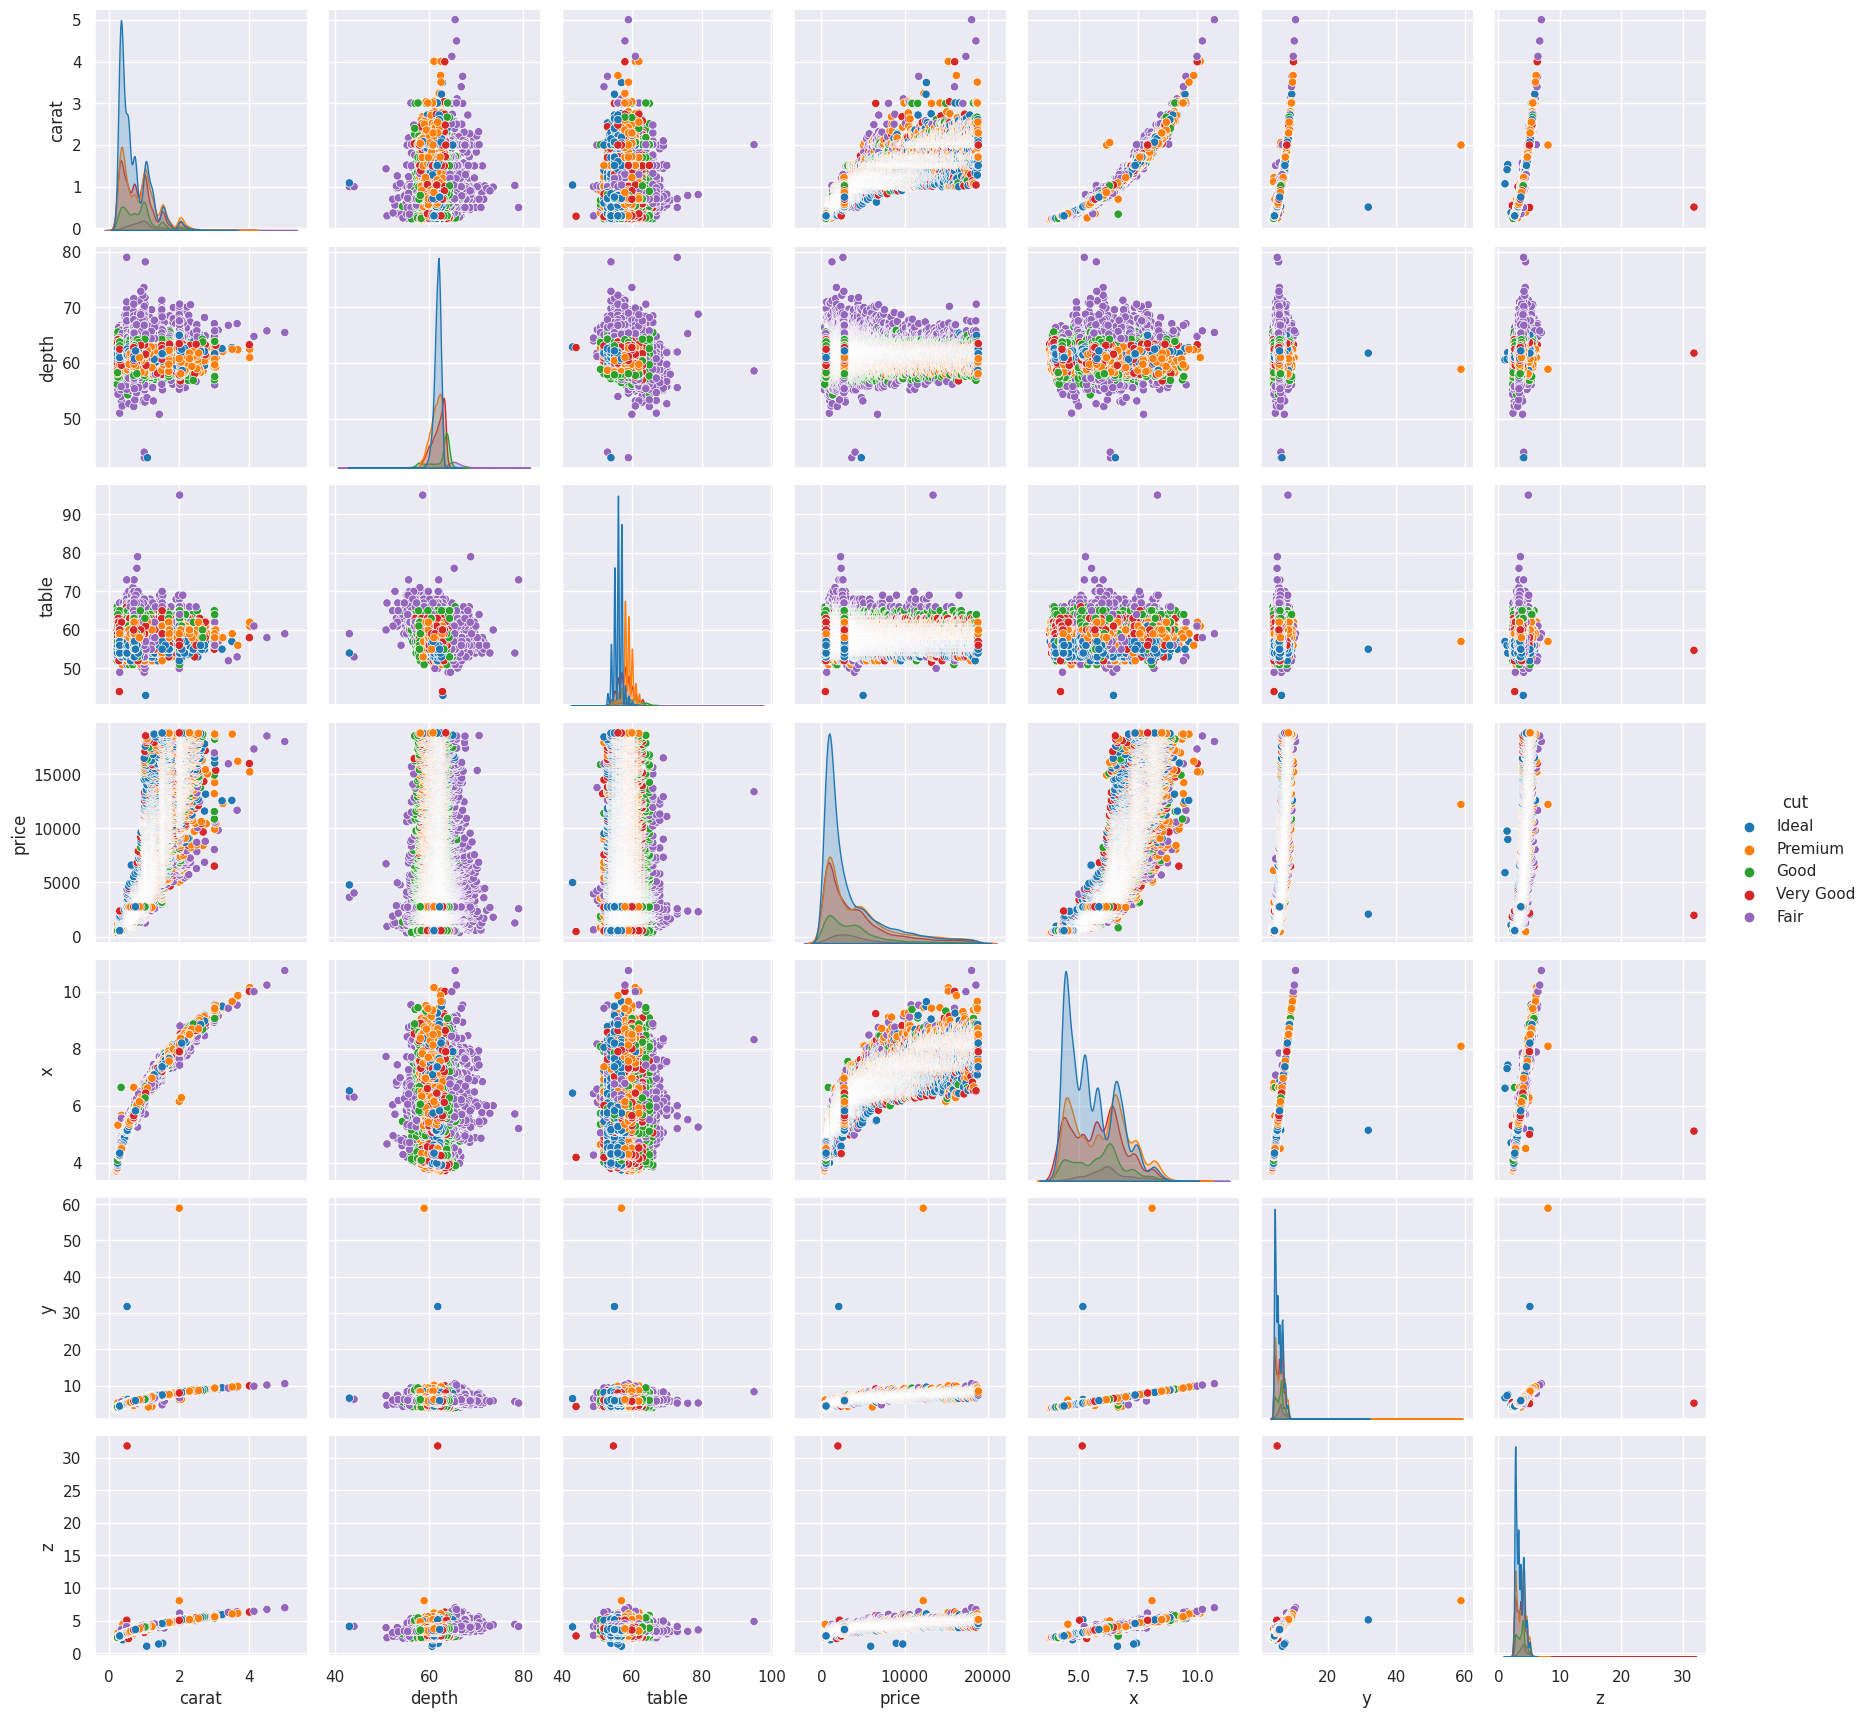

In [55]:
#Let's have a look at data
shade = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]#shades for hue
ax = sns.pairplot(data, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.

**A few points to notice in these pair plots**

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

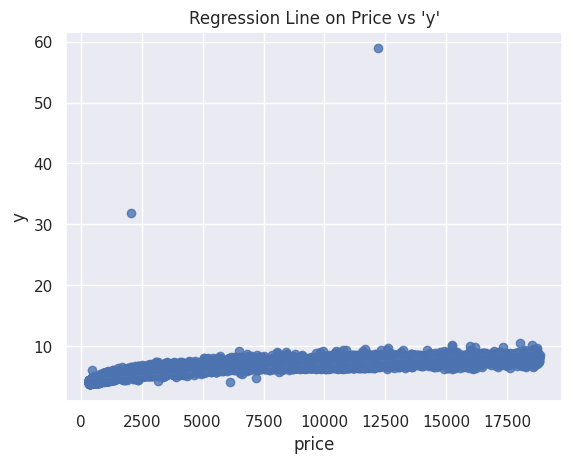

In [56]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True)
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

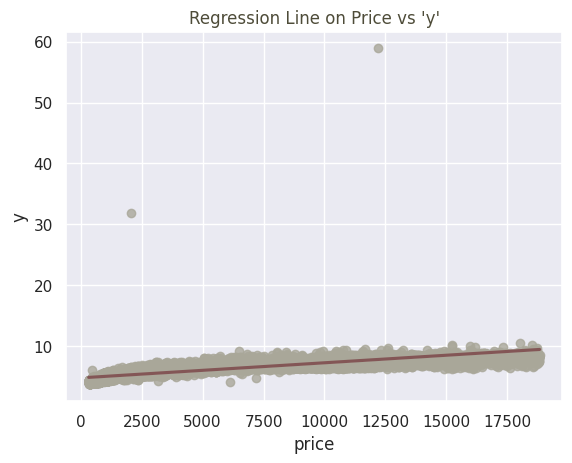

In [57]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

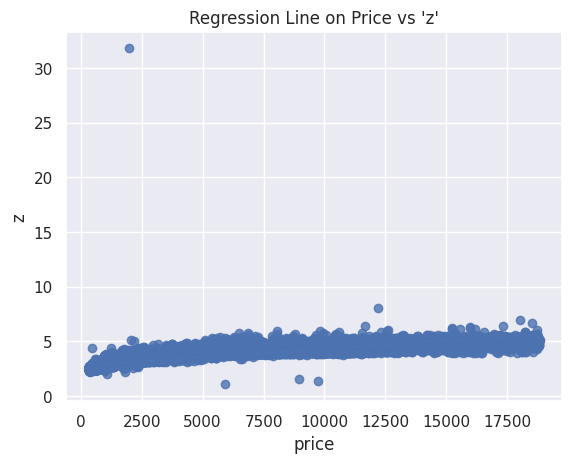

In [58]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True)
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

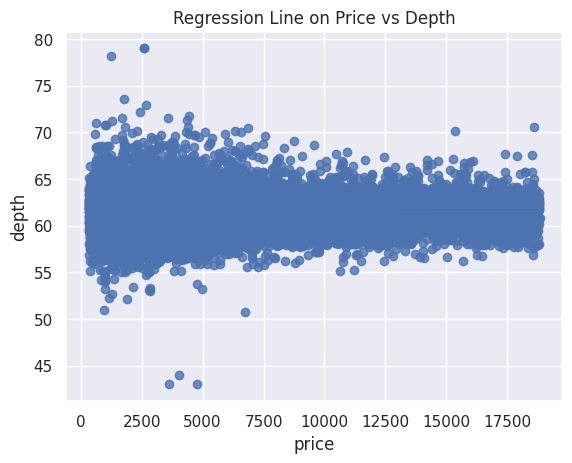

In [59]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True)
ax.set_title("Regression Line on Price vs Depth")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

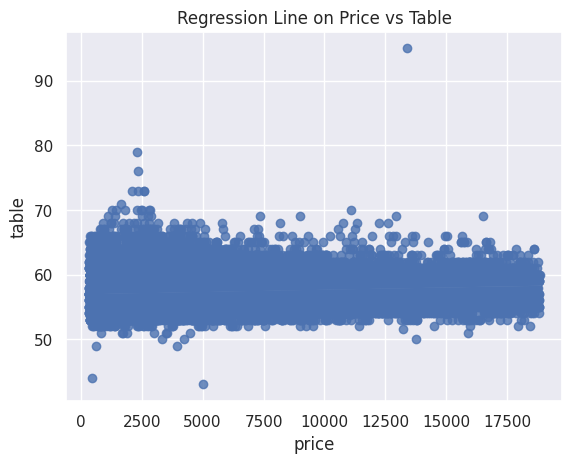

In [60]:
ax=sns.regplot(x="price", y="table", data=data, fit_reg=True)
ax.set_title("Regression Line on Price vs Table")

We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [61]:
#Dropping the outliers.
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

We can clearly spot outliers in these attributes. Next up, we will remove these data points.Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

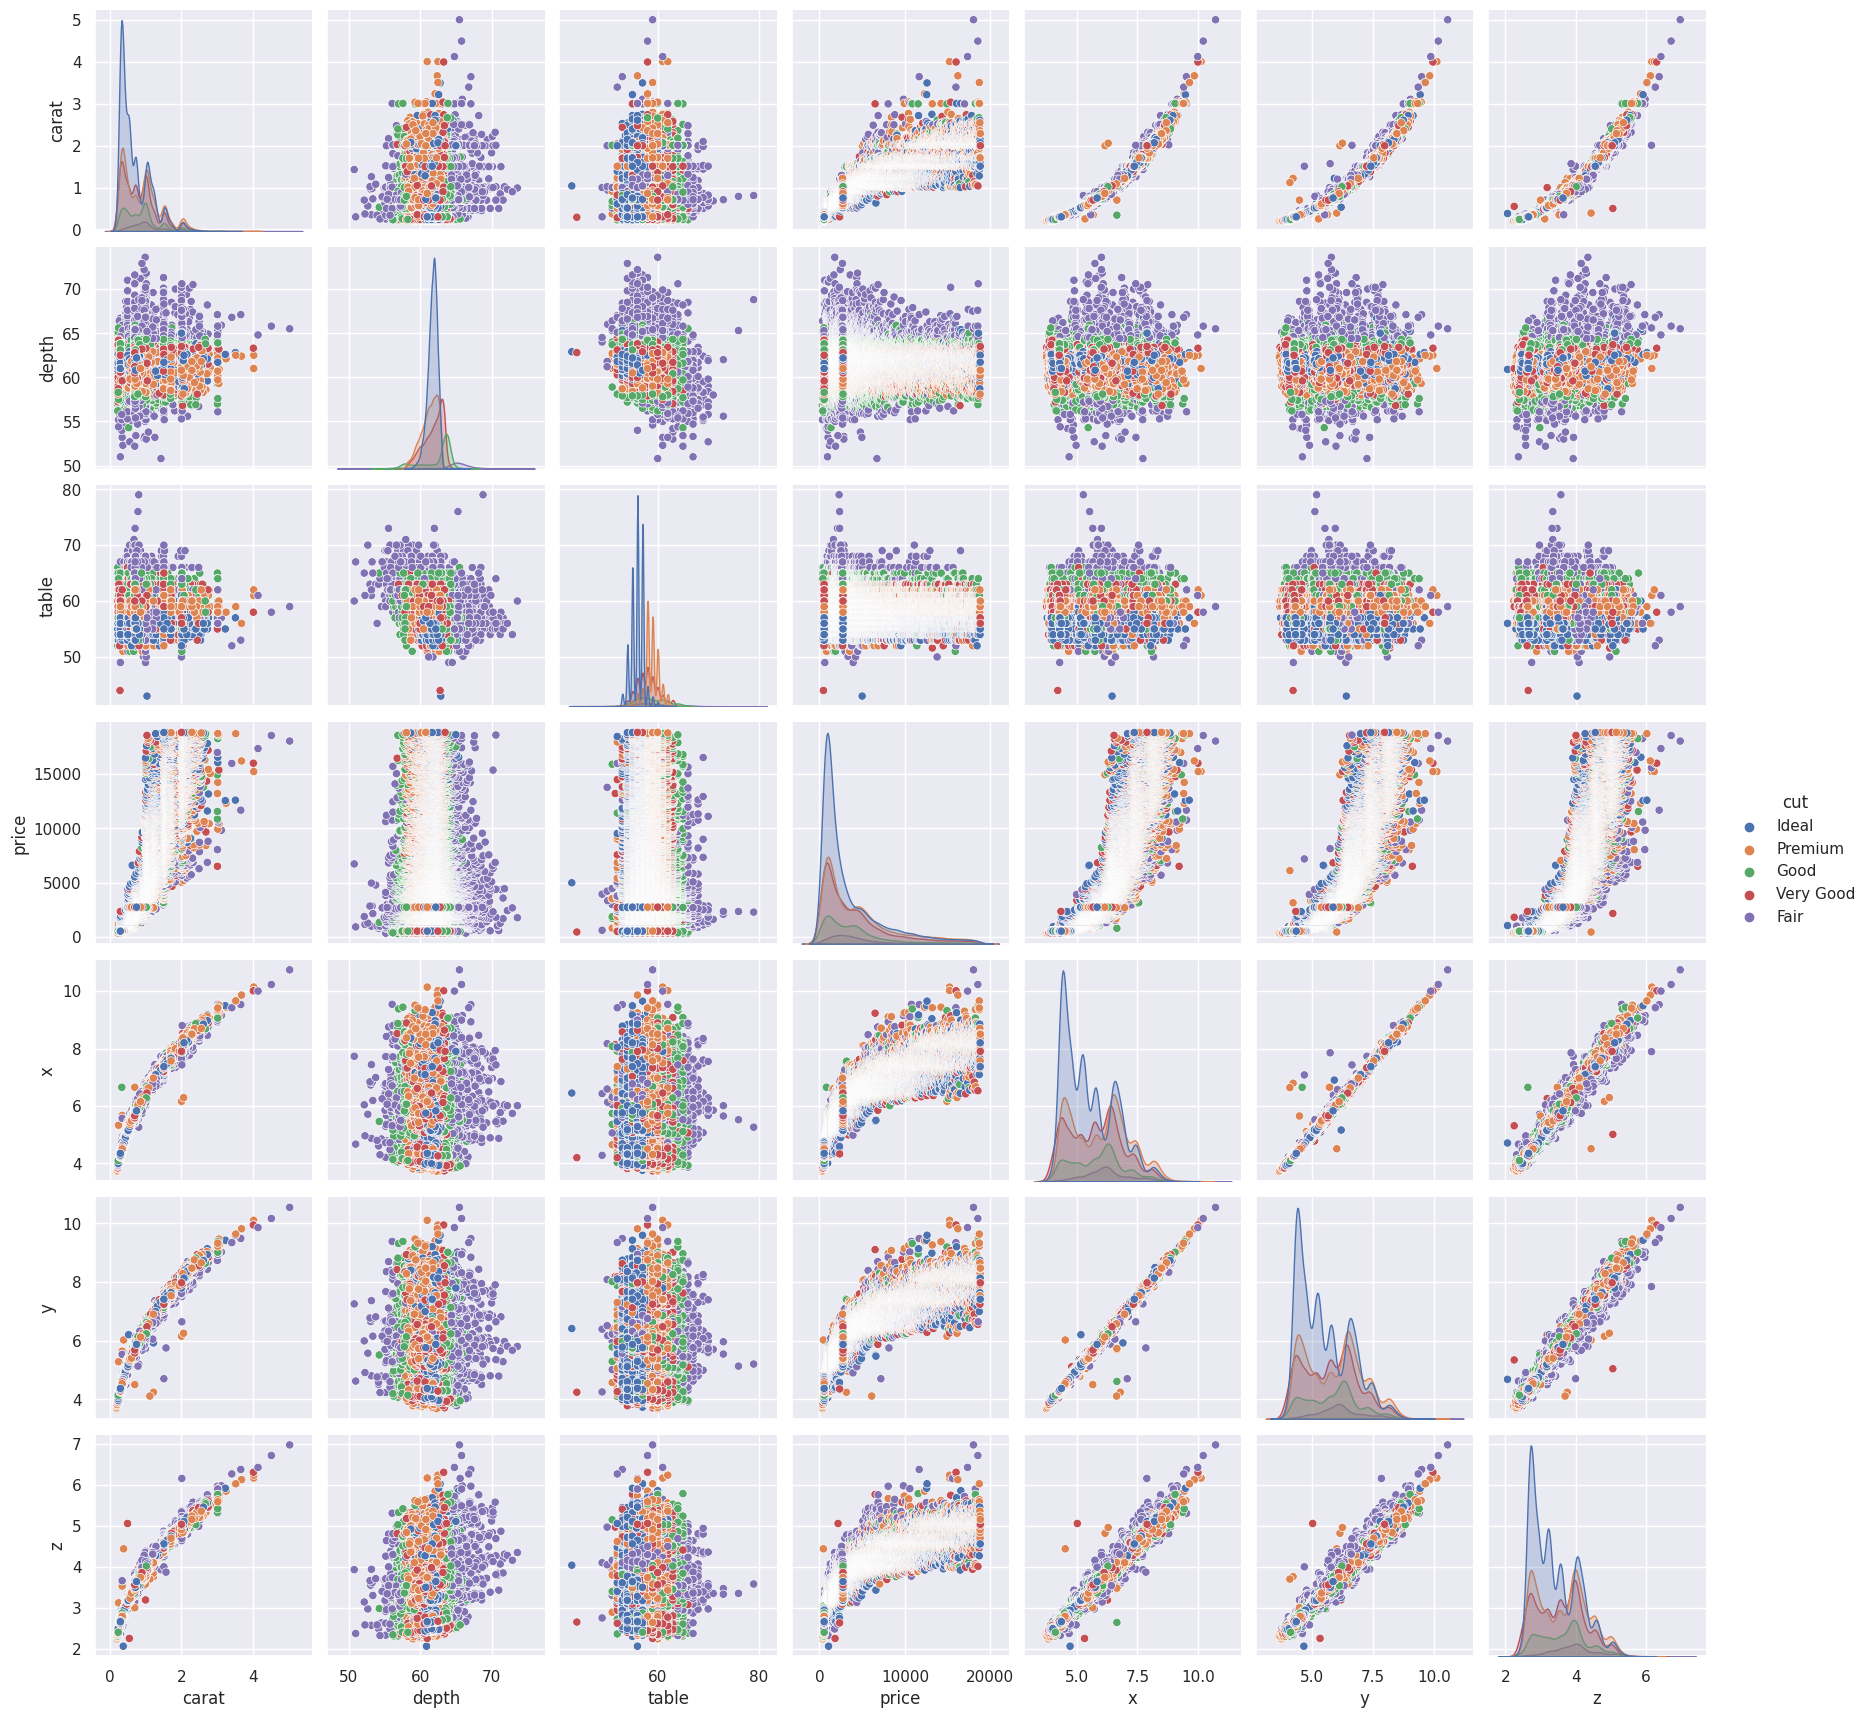

In [62]:
ax=sns.pairplot(data, hue= "cut")

That's a much cleaner dataset.
Next, we will deal with the categorical variables.

In [63]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Lable encoding the data to get rid of object dtype.

In [64]:
# Make copy to avoid changing original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [65]:
data.describe()

carat         depth         table         price             x  \
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000   
mean       0.797628     61.749741     57.455948   3930.584470      5.731463   
std        0.473765      1.420119      2.226153   3987.202815      1.119384   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5322.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53907.000000  53907.000000  
mean       5.733292      3.539441  
std        1.111252      0.691434  
min        3.680000      2.060000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       10.540000      6.980000

<Axes: >

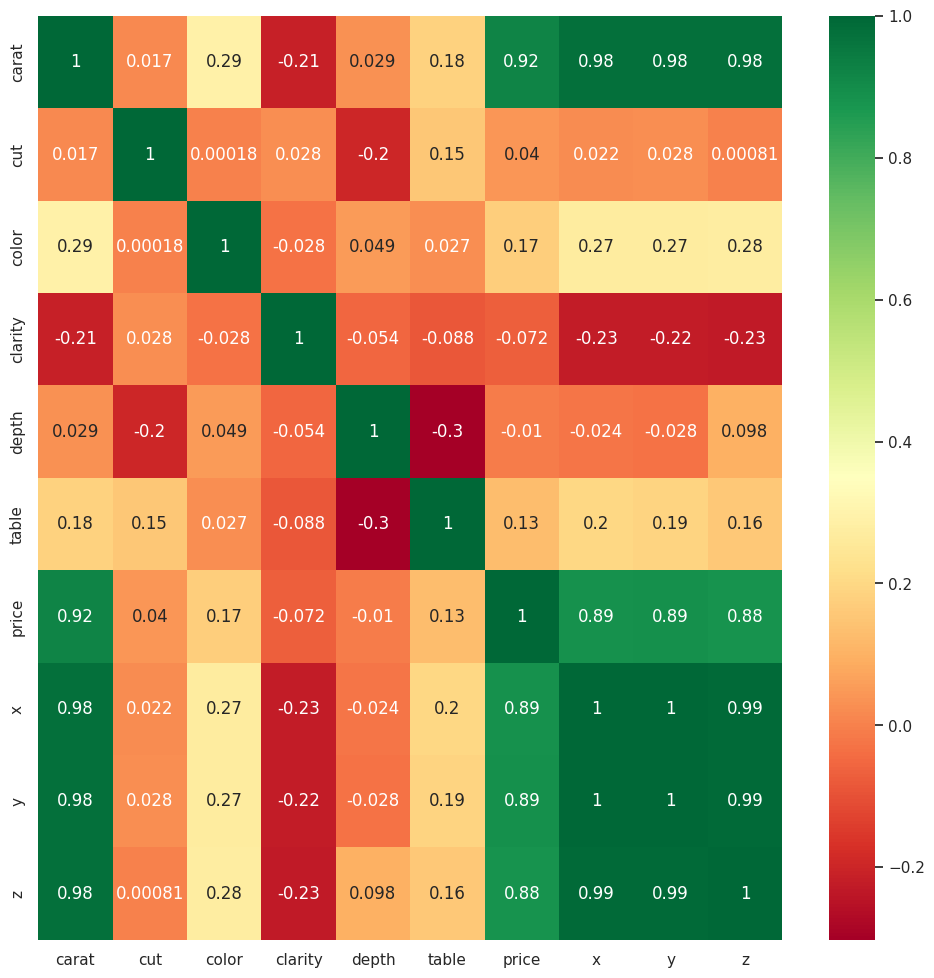

In [66]:
#correlation matrix
cmap = 'RdYlGn'
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y" and "z" show a high correlation to the target column.
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.



# Model Building

**Steps involved in Model Building**

* Setting up features and target
* Build a pipeline of standard scalar and model for five different regressors.
* Fit all the models on training data
* Get mean of cross-validation on the training set for all the models for negative root mean square error
* Pick the model with the best cross-validation score
* Fit the best model on the training set and get

In [67]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [68]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [69]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -746.864671 
RandomForest: -547.859451 
KNeighbors: -823.648809 
XGBRegressor: -547.645088 


**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [70]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [71]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842673897721
Adjusted R^2: 0.9803711581899881
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577


k-means clustering and dbscan clustering both are a form of unsupervised learning, which means that they do not require training data. k-NN clustering, on the other hand, is a form of supervised learning, which means that it does require training data. k-means clustering is also a much faster algorithm than DBScan clustering & k-NN clustering.

## Propensity Score Matching

In [72]:
pip install causalml


In [73]:
!pip install scikit-learn statsmodels

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


X = data[['carat', 'depth', 'table', 'x', 'y', 'z']].fillna(0)
y = data['cut']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model to estimate propensity scores
propensity_model = LogisticRegression(random_state=42)
propensity_model.fit(X_train, y_train)

# Calculate propensity scores for the entire dataset
propensity_scores = propensity_model.predict_proba(X)[:, 1]

# Combine propensity scores with treatment status (cut or not cut)
df_propensity = pd.DataFrame({'PropensityScore': propensity_scores, 'Treatment': y})

# Perform propensity score matching using statsmodels
matched_data = sm.add_constant(df_propensity)  # add constant term
matched_data['Matched'] = 0  # initialize matched column

for index, row in df_propensity.iterrows():
    matched_data.loc[(matched_data['Matched'] == 0) &
                     (matched_data['Treatment'] != row['Treatment']), 'Matched'] = 1
    matched_data.loc[(matched_data['Matched'] == 1) &
                     (matched_data['Treatment'] != row['Treatment']), 'Matched'] = 0

# Display matched data or use it for further analysis
print(matched_data)


       const  PropensityScore  Treatment  Matched
0        1.0         0.079775      Ideal        0
1        1.0         0.093307    Premium        0
2        1.0         0.039326       Good        0
3        1.0         0.103346    Premium        0
4        1.0         0.097406       Good        0
...      ...              ...        ...      ...
53935    1.0         0.086494      Ideal        0
53936    1.0         0.053666       Good        0
53937    1.0         0.099773  Very Good        0
53938    1.0         0.089173    Premium        0
53939    1.0         0.058254      Ideal        0

[53907 rows x 4 columns]


The 'PropensityScore' column signifies the likelihood of a diamond having a certain cut type based on observed features, calculated through logistic regression. The 'Treatment' column indicates the original cut type assigned to each diamond, such as 'Ideal,' 'Premium,' etc. The 'Matched' column, initialized to 0, appears to represent whether an observation has been successfully paired with a comparable control or treated unit based on their propensity scores. A 'Matched' value of 1 would suggest a successful match, while 0 indicates that the matching process may not have identified suitable pairs for certain observations. Propensity score matching aims to create balanced groups for a more reliable assessment of causal effects by mitigating the impact of confounding factors.

# **Conclusion**

In my analysis, I found Age to be a powerful predictor of stroke. As we conclude, it's vital to highlight the role of propensity scores in overcoming biases. While our models, especially the fine-tuned Logistic Regression, effectively identified stroke risk based on observable factors, establishing true causation demands a thoughtful approach. Propensity scores, derived from logistic regression, help level the playing field by matching treated and control groups, minimizing the impact of hidden biases. Yet, it's essential to remember that propensity score matching isn't a magic bullet for proving causation. To truly unravel the factors contributing to stroke, we must blend propensity scores with other causal methods and expert insights, forming a robust understanding of the complex web influencing stroke incidence.








# **References**

1.  https://www.kaggle.com/code/faizulislam19095/heart-disease-prediction-logistic-knn-naive-bayes
2.   https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
6. Scikit learn offcial documentation
7. https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
8. W3schools
9. Sample assignment from AISkunks - SmokeDetector and Wine Quality workbooks (Code from these assignments)
10. https://towardsdatascience.com/automl-and-the-future-of-data-science-82a1b8f65e7e
11. https://www.kaggle.com/code/jinxzed/interpreting-logistic-regression-using-shap
12. https://www.kaggle.com/datasets/ninjacoding/breast-cancer-wisconsin-benign-or-malignant
13. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
14. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# **License**

MIT License Copyright (c) 2023 Parvati J. Sohani Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.